In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from math import exp
%matplotlib inline
sns.set()

In [2]:
data1 = pd.read_csv('ex2data1.txt', header = None, names = ['exam1', 'exam2', 'y'])
data1['ones'] = pd.Series(np.ones(100), dtype = int)
data1 = data1[['ones', 'exam1', 'exam2', 'y']]
X = np.array(data1.iloc[:, 0:3])
y = np.array(data1.iloc[:, 3:])

In [21]:
def plotData(data, position1, position2, label_x, label_y, label_pos, label_neg):
    # Get indexes for class 0 and class 1
    neg = data.iloc[:, len(data.columns) - 1] == 0
    pos = data.iloc[:, len(data.columns) - 1] == 1
    
    plt.scatter(data[pos].iloc[:, position1], data[pos].iloc[:, position2], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    plt.scatter(data[neg].iloc[:, position1], data[neg].iloc[:, position2], c = 'r', s = 50, label = label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(loc = 1, frameon= False);

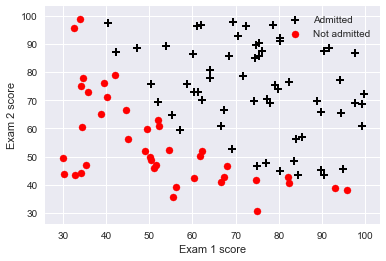

In [22]:
plotData(data1, 1, 2, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [5]:
def gFunction(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def hFunction(theta, X):
    theta = np.array(theta).T
    h = np.array(gFunction(np.dot(X, theta)))
    return h

In [7]:
def costFunction(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    j = (-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))
    return j
    
costFunction([0, 0, 0], X, y)

array([ 0.69314718])

In [8]:
def gradientDescent(theta, X, y):
    m = y.size
    h = hFunction(theta, X).reshape(100, 1)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient.flatten()

gradientDescent([0, 0, 0], X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [9]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradientDescent(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [10]:
def optimizer(costFunction, theta, X, y, gradientDescent):
    optimum = sc.optimize.minimize(costFunction, theta, args = (X, y), method = None, jac = gradientDescent, options={'maxiter' : 400})
    return optimum

optimum = optimizer(costFunction, initial_theta, X, y, gradientDescent)
optimum

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.2034977015894438
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476822e-09,  -9.31921318e-07,  -2.82608930e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

def predict(theta, exam1, exam2):
    x = np.array([1, exam1, exam2])
    predict = hFunction(optimum.x, x)
    print(1) if predict >= 0.5 else print(0)
    return predict

predict(optimum.x, 45, 85)

In [11]:
def predict(theta, X, threshold=0.5):
    p = gFunction(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

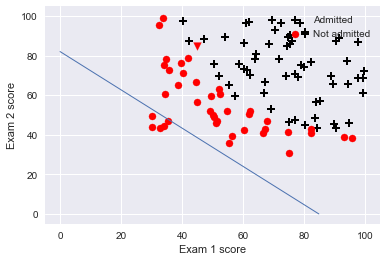

In [61]:
plotData(data1, 1, 2, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plt.plot([0, 124.888], [122.005, 0], label='line 1', linewidth = 1)

In [24]:
data2 = pd.read_csv('ex2data2.txt', header = None, names = ['Microchip Test 1', 'Microchip Test 2', 'y'])
y2 = np.array(data2.iloc[:, 2]).reshape(118, 1)
X2 = np.array(data2.iloc[:, 0:2])

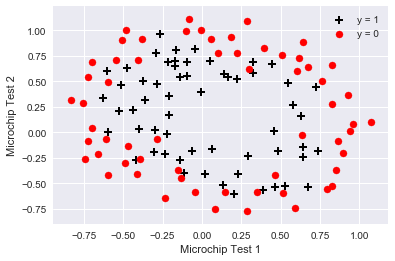

In [25]:
plotData(data2, 0, 1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [26]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2.iloc[:, 0:2])
XX.shape

(118, 28)

In [27]:
def regularizedCostFunction(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(-1, 1)
    j = ((-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))) + (λ / (2 *  m)) * np.sum(np.square(theta[1:]))
    return j

In [28]:
def regularizedGradientDescent(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(118, 1)
    theta[0] = 0
    gradient = (1 / m) * np.dot(X.T, (h - y)) + (λ / m * theta).reshape(-1, 1)
    return gradient.flatten()

In [110]:
#initial_theta2 = np.zeros(XX.shape[1])
#print(costFunctionReg(initial_theta2, XX, y2))
#print(gradientReg(initial_theta2, XX, y2))
#print(sc.optimize.minimize(regularizedCostFunction, initial_theta2, args = (XX, y2), method = None, jac = regularizedGradientDescent, options = {'maxiter':3000}))